In [1]:
import pandas as pd

In [18]:
df=pd.read_csv('C:/Users/udipt/Desktop/Websoft/Assignment/DataScienceCaseStudy/dataSample.csv')

# Preprocessing

In [19]:
df=pd.get_dummies(df)
df=df.rename(columns={'Unnamed: 0':'sl_number'})
df.columns

Index(['sl_number', 'ID', 'event_timestamp', 'log_timestamp', 'log_reading_1',
       'log_reading_3', 'log_reading_4', 'Type_TypeA', 'Type_TypeB',
       'event_label_activate', 'event_label_break', 'log_reading_2_a',
       'log_reading_2_b', 'log_reading_2_c', 'warranty_service_flag_n',
       'warranty_service_flag_y'],
      dtype='object')

In [20]:
df=df.drop(columns=['event_label_activate','warranty_service_flag_n'],axis=1)

In [22]:
df['log_reading_1'].fillna(df['log_reading_1'].median(),inplace=True)
df['log_reading_3'].fillna(df['log_reading_3'].median(),inplace=True)

# Train test split

In [23]:
x=df.drop(columns=['event_label_break'],axis=1)
y=df['event_label_break']
print(f'The data has {y.mean()*100:.2f}% of positive points')

The data has 34.15% of positive points


In [24]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,stratify=y,test_size=.27,random_state=10)
print(x_tr.shape,x_te.shape,y_tr.shape,y_te.shape)
print(f'Training set has {y_tr.mean()*100:.2f}% positive points and test sets {y_te.mean()*100:.2f}% of positive points')

(11798, 13) (4364, 13) (11798,) (4364,)
Training set has 34.15% positive points and test sets 34.14% of positive points


# XGB

In [8]:
from xgboost import XGBClassifier

In [26]:
xg=XGBClassifier(n_estimators=250,n_jobs=-1,random_state=10)
xg.fit(x_tr,y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_prob=xg.predict_proba(x_te)
y_pred=xg.predict(x_te)
print(f'The model predicts {y_pred.mean()*100:.2f}% points as positive')

The model predicts 35.45% points as positive


# SHAP

In [29]:
import shap

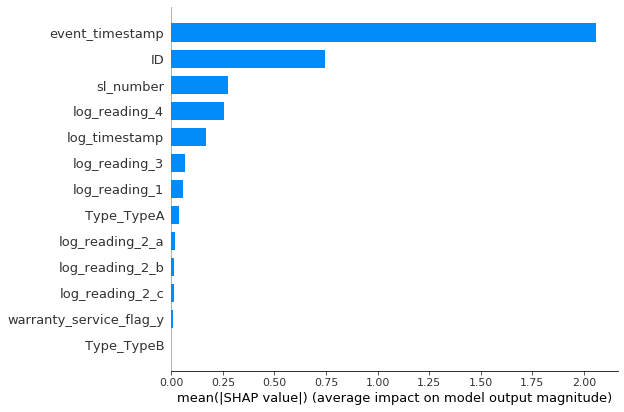

In [39]:
shap_values_tr=shap.TreeExplainer(xg).shap_values(x_tr)
shap.summary_plot(shap_values_tr,x_tr,plot_type='bar')

In [54]:
shap_values_tr

array([[-2.2592952e-02, -6.7740709e-01,  2.0462716e+00, ...,
         2.7165657e-03,  5.4219235e-03, -6.3222449e-04],
       [ 2.1617636e-01, -5.7660729e-01, -4.5182185e+00, ...,
        -7.8367261e-04, -3.5384383e-02, -5.1312167e-03],
       [-3.4036669e-01, -1.1585912e-01,  1.6192280e+00, ...,
        -5.3823823e-03, -1.3047381e-03,  6.7601427e-03],
       ...,
       [ 1.1282853e-01,  1.5279566e-01,  1.3620981e+00, ...,
        -7.1309310e-05, -2.3453864e-03,  1.1331594e-03],
       [-3.9531056e-02, -1.0552818e+00, -9.0074533e-01, ...,
        -9.0579776e-04, -1.6584391e-03,  5.5680219e-03],
       [ 2.6528609e-01,  1.0070571e-01,  1.6323812e+00, ...,
         1.7821847e-02, -6.8608625e-04,  2.4638104e-03]], dtype=float32)

In [55]:
shap_values_tr[0]

array([-2.2592952e-02, -6.7740709e-01,  2.0462716e+00, -2.5082612e-02,
        1.6152283e-02, -3.9519899e-02, -6.6191785e-02, -2.9373204e-04,
        0.0000000e+00,  6.7296284e-03,  2.7165657e-03,  5.4219235e-03,
       -6.3222449e-04], dtype=float32)

In [56]:
shap_values_tr[1]

array([ 2.1617636e-01, -5.7660729e-01, -4.5182185e+00, -4.5403042e-01,
       -3.0690547e-02,  4.2719475e-04, -2.3553935e-01,  2.5176490e-02,
        0.0000000e+00,  2.0690383e-03, -7.8367261e-04, -3.5384383e-02,
       -5.1312167e-03], dtype=float32)

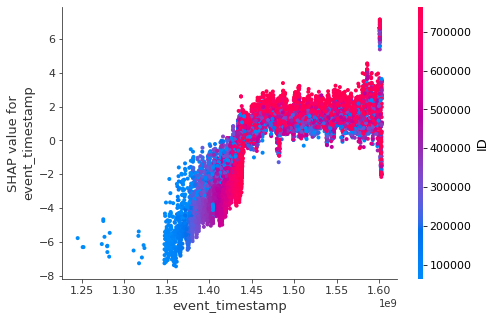

In [40]:
shap.dependence_plot('event_timestamp',shap_values_tr,x_tr)

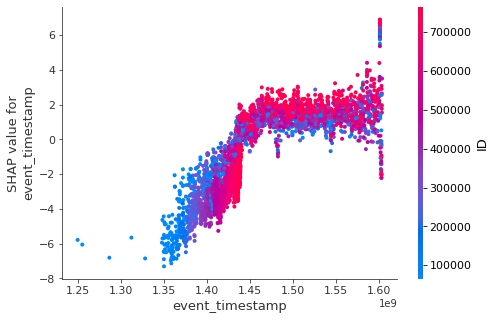

In [41]:
shap_values_te=shap.TreeExplainer(xg).shap_values(x_te)
shap.dependence_plot('event_timestamp',shap_values_te,x_te)

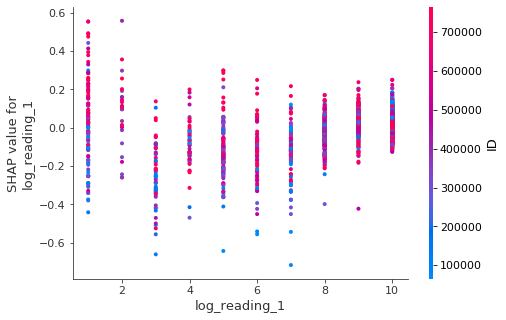

In [34]:
shap.dependence_plot('log_reading_1',shap_values,x_te)